In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [18]:
df = pd.read_csv(r'C:\Users\kaushik\OneDrive\Desktop\KAUSHIK\Python\Python_Diwali_Sales_Analysis\Diwali_Sales_Data.csv',encoding = 'unicode_escape')

In [19]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [20]:
df.shape

(11251, 15)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [22]:
df.drop(columns = ['Status','unnamed1'],inplace = True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


Removed blank columns

In [28]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [29]:
df.dropna(inplace = True)

In [30]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

Removed the rows in which null values were present

In [31]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [32]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610858
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355869
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [34]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610858
std,12.753866,1.114967,5222.355869
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


   # Exploratory Data Analysis

### Gender

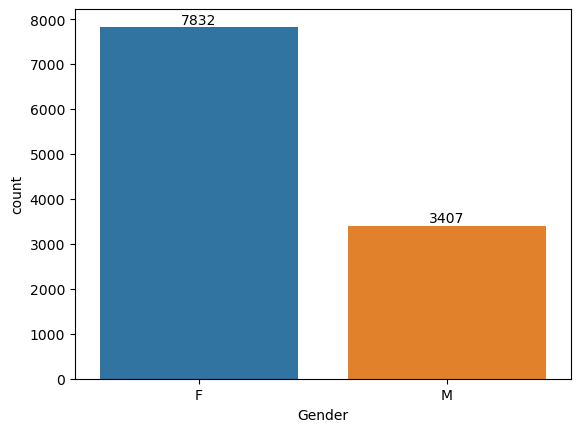

In [38]:
gender_count = sns.countplot(x = 'Gender',data = df)

for x in gender_count.containers:
    gender_count.bar_label(x)

In [47]:
sales_by_gender = df.groupby(by = ['Gender'],as_index = False)['Amount'].sum().sort_values(by = 'Amount',ascending = False)

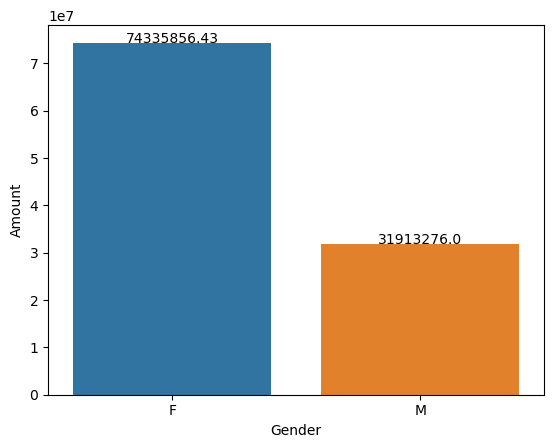

In [54]:
sns.barplot(x = 'Gender', y = 'Amount', data = sales_by_gender)
for index, row in sales_by_gender.iterrows():
    plt.text(row.name, row.Amount, str(row.Amount),ha = 'center')
plt.show()

#### Female customers are more in number & also generate a higher percentage of the total amount.

### Age

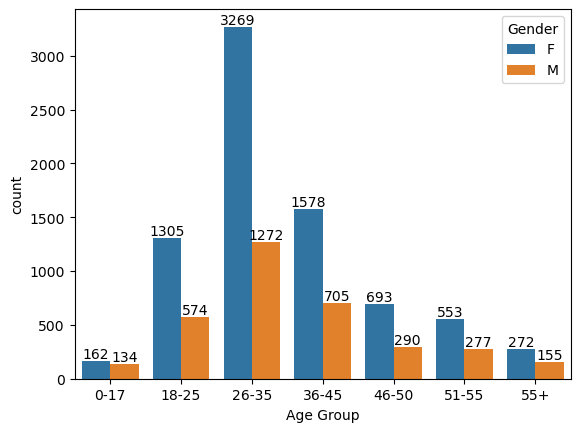

In [61]:
age_order = sorted(df['Age Group'].unique())

age = sns.countplot(data = df, x = 'Age Group', hue = 'Gender',order = age_order)

for x in age.containers:
    age.bar_label(x)

<Axes: xlabel='Age Group', ylabel='Amount'>

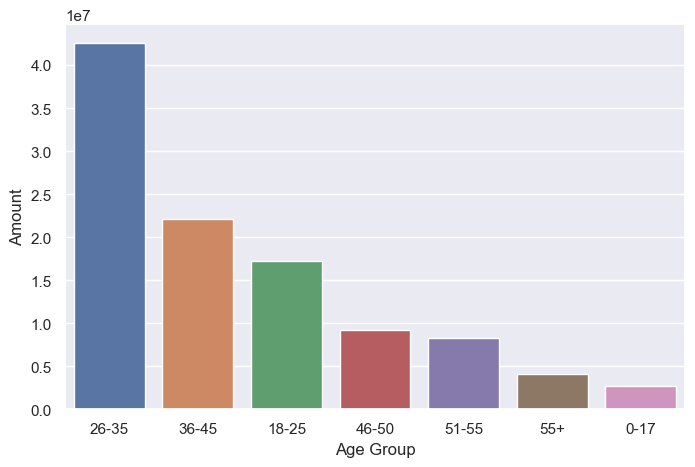

In [125]:
sales_by_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(8,5)})
sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_by_age)

#### From above graphs we can see that most of the buyers are of age group between 26-35 yrs female.

### State

<Axes: xlabel='State', ylabel='Orders'>

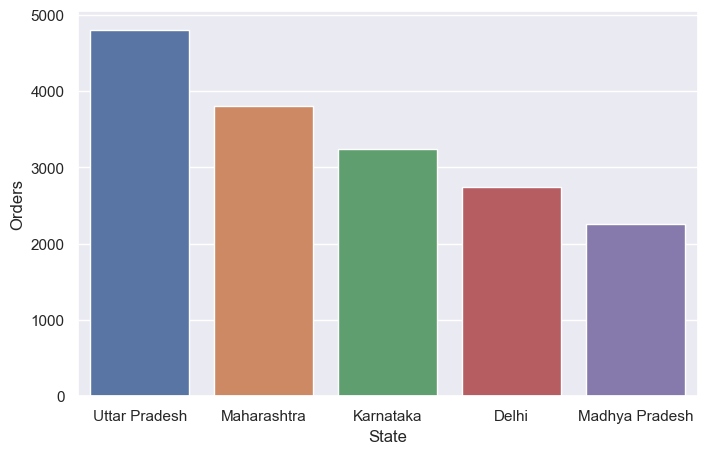

In [130]:
# total number of orders from top 5 states

orders_by_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head()

#sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = orders_by_state, x = 'State',y= 'Orders')

<Axes: xlabel='State', ylabel='Amount'>

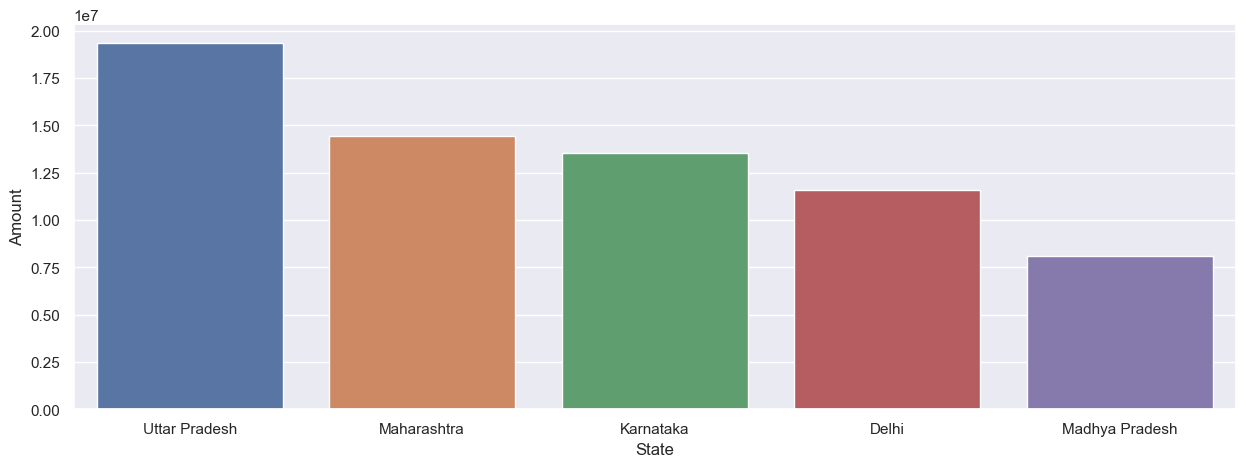

In [72]:
# total amount/sales from top 10 states

sales_by_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(5)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_by_state, x = 'State',y= 'Amount')

#### From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively

### Marital Status

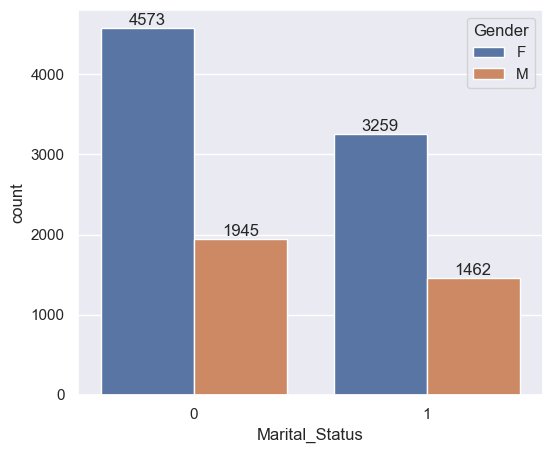

In [85]:
status = sns.countplot(data = df, x = 'Marital_Status',hue = 'Gender')

sns.set(rc={'figure.figsize':(6,2)})
for x in status.containers:
    status.bar_label(x)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

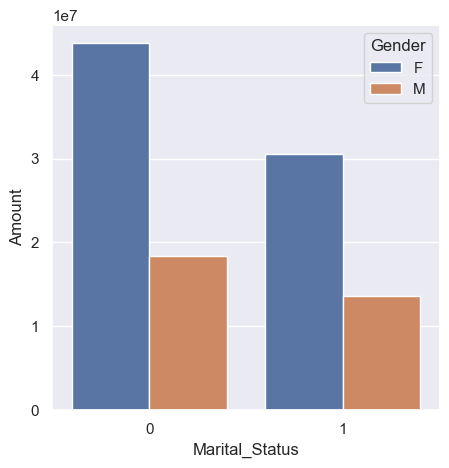

In [132]:
sales_by_status = df.groupby(['Marital_Status','Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(x = 'Marital_Status', y = 'Amount', data = sales_by_status,hue= 'Gender')

#### From above graphs we can see that most of the buyers are married (women) and they have high purchasing power

### Occupation

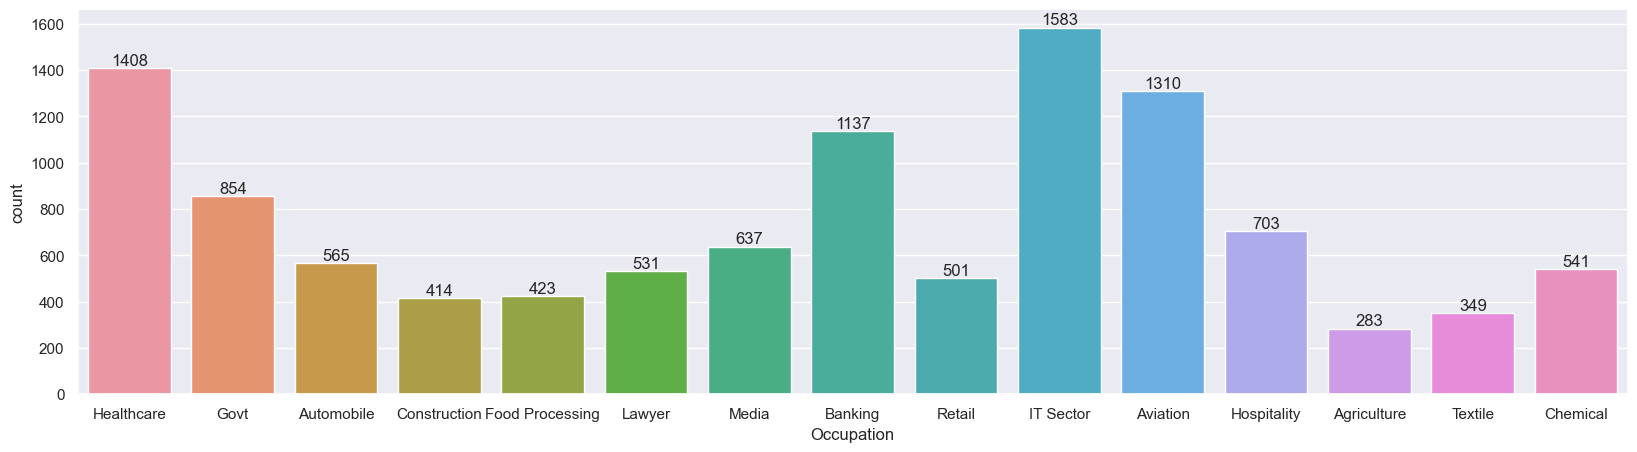

In [95]:
sns.set(rc={'figure.figsize':(20,5)})
occ = sns.countplot(data = df, x = 'Occupation')

for x in occ.containers:
    occ.bar_label(x)

<Axes: xlabel='Occupation', ylabel='Amount'>

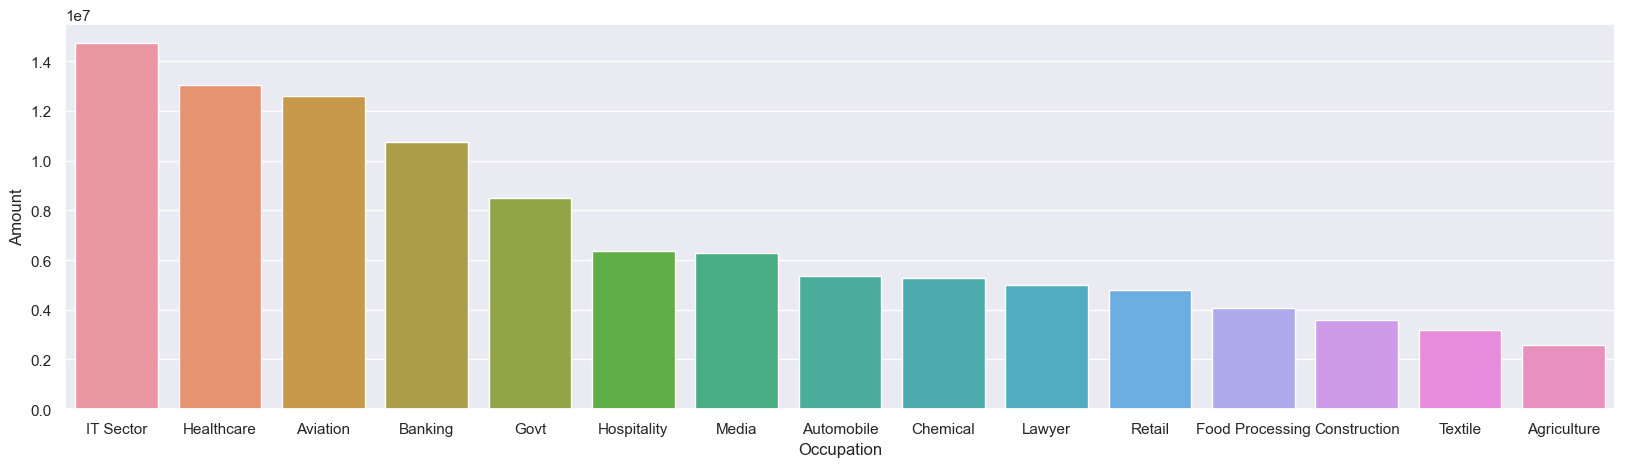

In [96]:
sales_by_occ = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_by_occ, x = 'Occupation',y= 'Amount')

#### From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector

### Product Category

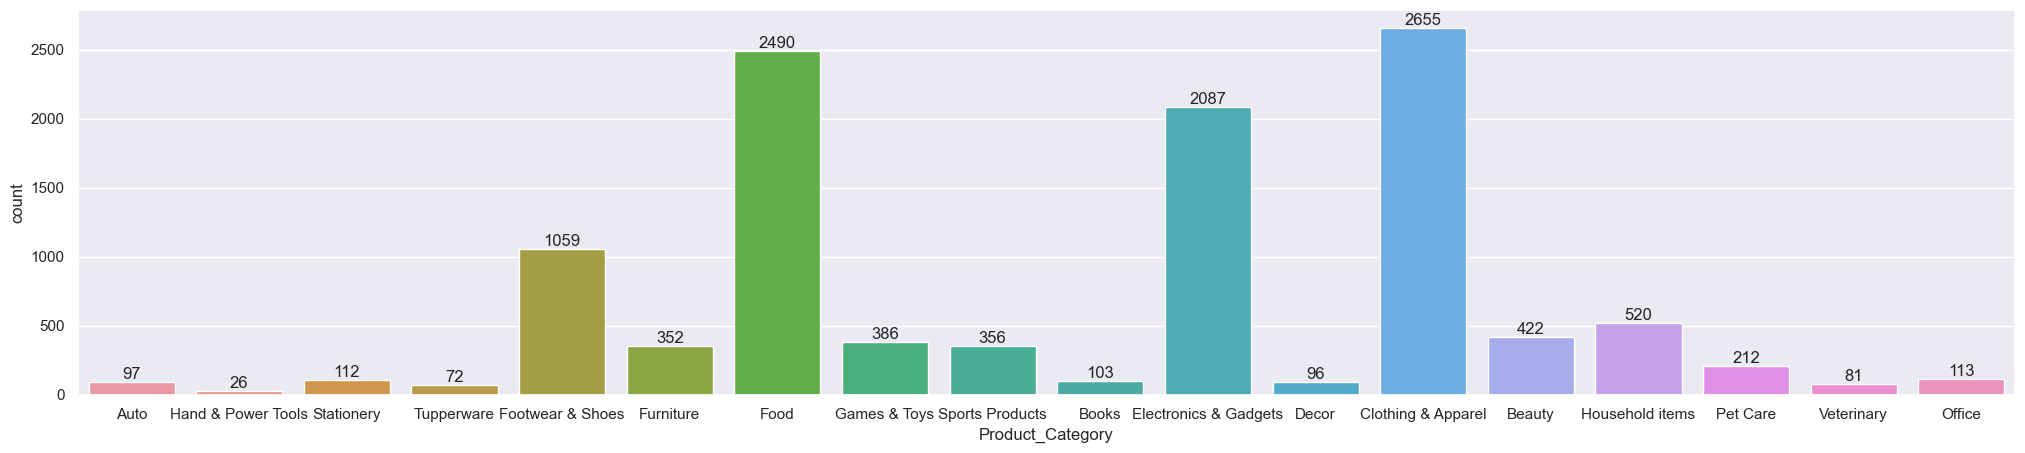

In [101]:
sns.set(rc={'figure.figsize':(25,5)})
pdt = sns.countplot(data = df, x = 'Product_Category')

for x in pdt.containers:
    pdt.bar_label(x)

<Axes: xlabel='Product_Category', ylabel='Amount'>

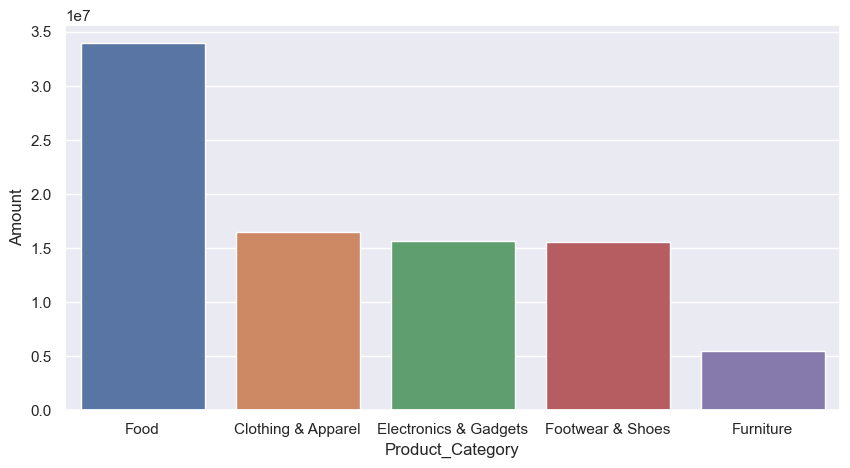

In [107]:
sales_by_pdt = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(5)

sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(data = sales_by_pdt, x = 'Product_Category',y= 'Amount')

#### From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category

#### Product ID

<Axes: xlabel='Product_ID', ylabel='Orders'>

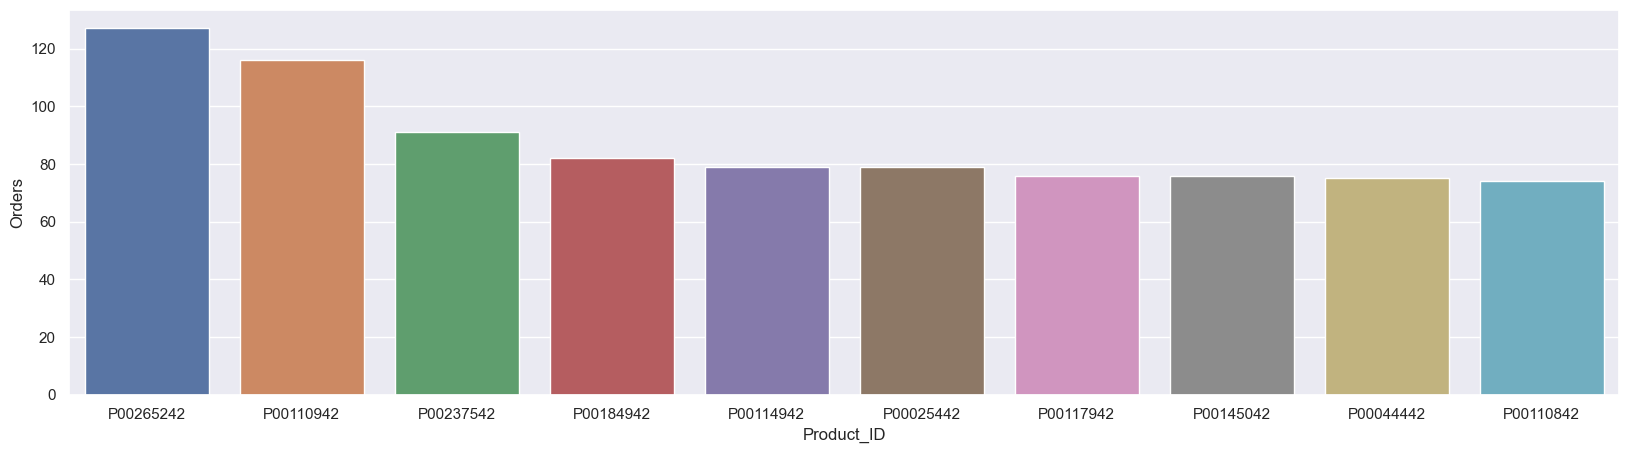

In [131]:
order_pdt_id = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = order_pdt_id, x = 'Product_ID',y= 'Orders')

## Conclusion:
Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category